# Minimal example with TensorFlow 2.0
In this notebook we will recreate our machine learning algorithm using TF 2.0.

## Import the relevant libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## Data generation

In [2]:
observations = 1000

xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10, 10, (observations,1))

generated_inputs = np.column_stack((xs,zs))

noise = np.random.uniform(-1, 1, (observations,1))

generated_targets = 2*xs - 3*zs + 5 + noise

np.savez('TF_intro', inputs=generated_inputs, targets=generated_targets)


## Solving with TensorFlow

In [3]:
training_data = np.load('TF_intro.npz')

In [4]:
input_size = 2
output_size = 1

model = tf.keras.Sequential([
                            tf.keras.layers.Dense(output_size,
                                                  kernel_initializer=tf.random_uniform_initializer(minval=0.1, maxval=0.1),
                                                  bias_initializer=tf.random_uniform_initializer(minval=0.1, maxval=0.1))
                            ])

custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)

model.compile(optimizer=custom_optimizer, loss='mean_squared_error')

model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=2)

Epoch 1/100
32/32 - 0s - loss: 27.4666
Epoch 2/100
32/32 - 0s - loss: 1.0483
Epoch 3/100
32/32 - 0s - loss: 0.4832
Epoch 4/100
32/32 - 0s - loss: 0.4119
Epoch 5/100
32/32 - 0s - loss: 0.4437
Epoch 6/100
32/32 - 0s - loss: 0.3951
Epoch 7/100
32/32 - 0s - loss: 0.4644
Epoch 8/100
32/32 - 0s - loss: 0.3997
Epoch 9/100
32/32 - 0s - loss: 0.3990
Epoch 10/100
32/32 - 0s - loss: 0.3995
Epoch 11/100
32/32 - 0s - loss: 0.3885
Epoch 12/100
32/32 - 0s - loss: 0.3837
Epoch 13/100
32/32 - 0s - loss: 0.3900
Epoch 14/100
32/32 - 0s - loss: 0.3942
Epoch 15/100
32/32 - 0s - loss: 0.4434
Epoch 16/100
32/32 - 0s - loss: 0.4164
Epoch 17/100
32/32 - 0s - loss: 0.3640
Epoch 18/100
32/32 - 0s - loss: 0.3759
Epoch 19/100
32/32 - 0s - loss: 0.3610
Epoch 20/100
32/32 - 0s - loss: 0.3719
Epoch 21/100
32/32 - 0s - loss: 0.3901
Epoch 22/100
32/32 - 0s - loss: 0.4343
Epoch 23/100
32/32 - 0s - loss: 0.3862
Epoch 24/100
32/32 - 0s - loss: 0.4413
Epoch 25/100
32/32 - 0s - loss: 0.4242
Epoch 26/100
32/32 - 0s - loss: 0

## Extract the weights and bias

In [5]:
model.layers[0].get_weights()

[array([[ 2.029457 ],
        [-3.0219383]], dtype=float32),
 array([4.9865155], dtype=float32)]

## Extract the outputs (make predictions)

In [6]:
model.predict_on_batch(training_data['inputs'])

array([[-3.22854185e+00],
       [-2.56123333e+01],
       [ 5.14955559e+01],
       [-2.28110924e+01],
       [-8.72138023e+00],
       [ 2.59077873e+01],
       [-1.03850536e+01],
       [-7.19063234e+00],
       [ 2.86640396e+01],
       [-6.86041355e-01],
       [ 9.19607544e+00],
       [ 4.50965919e+01],
       [-2.53271599e+01],
       [ 1.54842682e+01],
       [ 2.97366180e+01],
       [ 2.37092323e+01],
       [-1.75282402e+01],
       [-2.52701139e+00],
       [-1.92538376e+01],
       [-3.16486435e+01],
       [ 1.05257645e+01],
       [ 4.09511642e+01],
       [ 1.79330254e+01],
       [-3.46836205e+01],
       [-2.34200287e+01],
       [-2.68040028e+01],
       [ 3.85378761e+01],
       [-1.74078941e-02],
       [ 1.54820404e+01],
       [ 1.52895699e+01],
       [ 1.92655430e+01],
       [-2.45456066e+01],
       [ 1.56040535e+01],
       [-1.39974356e+00],
       [ 4.28912830e+00],
       [-1.75066471e+01],
       [ 2.68029633e+01],
       [-2.91445847e+01],
       [-2.8

## Plotting the data

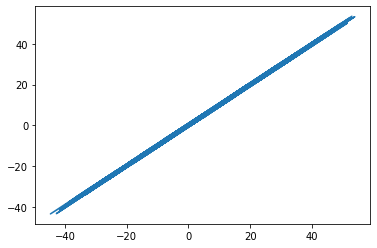

In [7]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets']))
plt.show()